In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../Prepared_Data/data.csv')

In [2]:
##### Set the Plot Sheme #####
import tueplots
from tueplots import bundles

# this provides the color palette of Uni Tuebingen
from tueplots.constants.color import rgb
# e.g. as rgb.tue_blue, rgb.tue_red, etc.

# set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

In [3]:
##### Cluster data #####

# remove rows that have values missing
data = data.dropna()

# calculate correlation between 'year' and each complexity factor
correlation_with_year = data[['year', 'number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                                   'number_of_categories', 'number_of_unique_parts', 'number_of_different_parts',
                                   'not_unique_parts', 'proportion_unique_to_not_unique']].corr()['year']


print(correlation_with_year)

# select relevant columns for clustering
columns_for_clustering = ['number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                           'number_of_categories', 'number_of_unique_parts',
                           'number_of_different_parts', 'not_unique_parts',
                           'proportion_unique_to_not_unique']

# extract the selected columns for clustering
data_for_clustering = data[columns_for_clustering]

# impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
data_for_clustering_imputed = imputer.fit_transform(data_for_clustering)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering_imputed)

# determine the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

year                               1.000000
number_of_parts                    0.158739
minifig_quantitiy                  0.133500
number_of_colors                   0.376798
number_of_categories               0.275752
number_of_unique_parts             0.241843
number_of_different_parts          0.213099
not_unique_parts                   0.149541
proportion_unique_to_not_unique    0.022619
Name: year, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

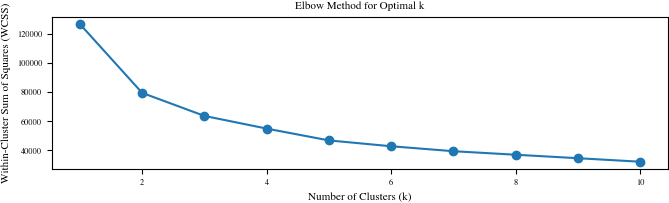

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


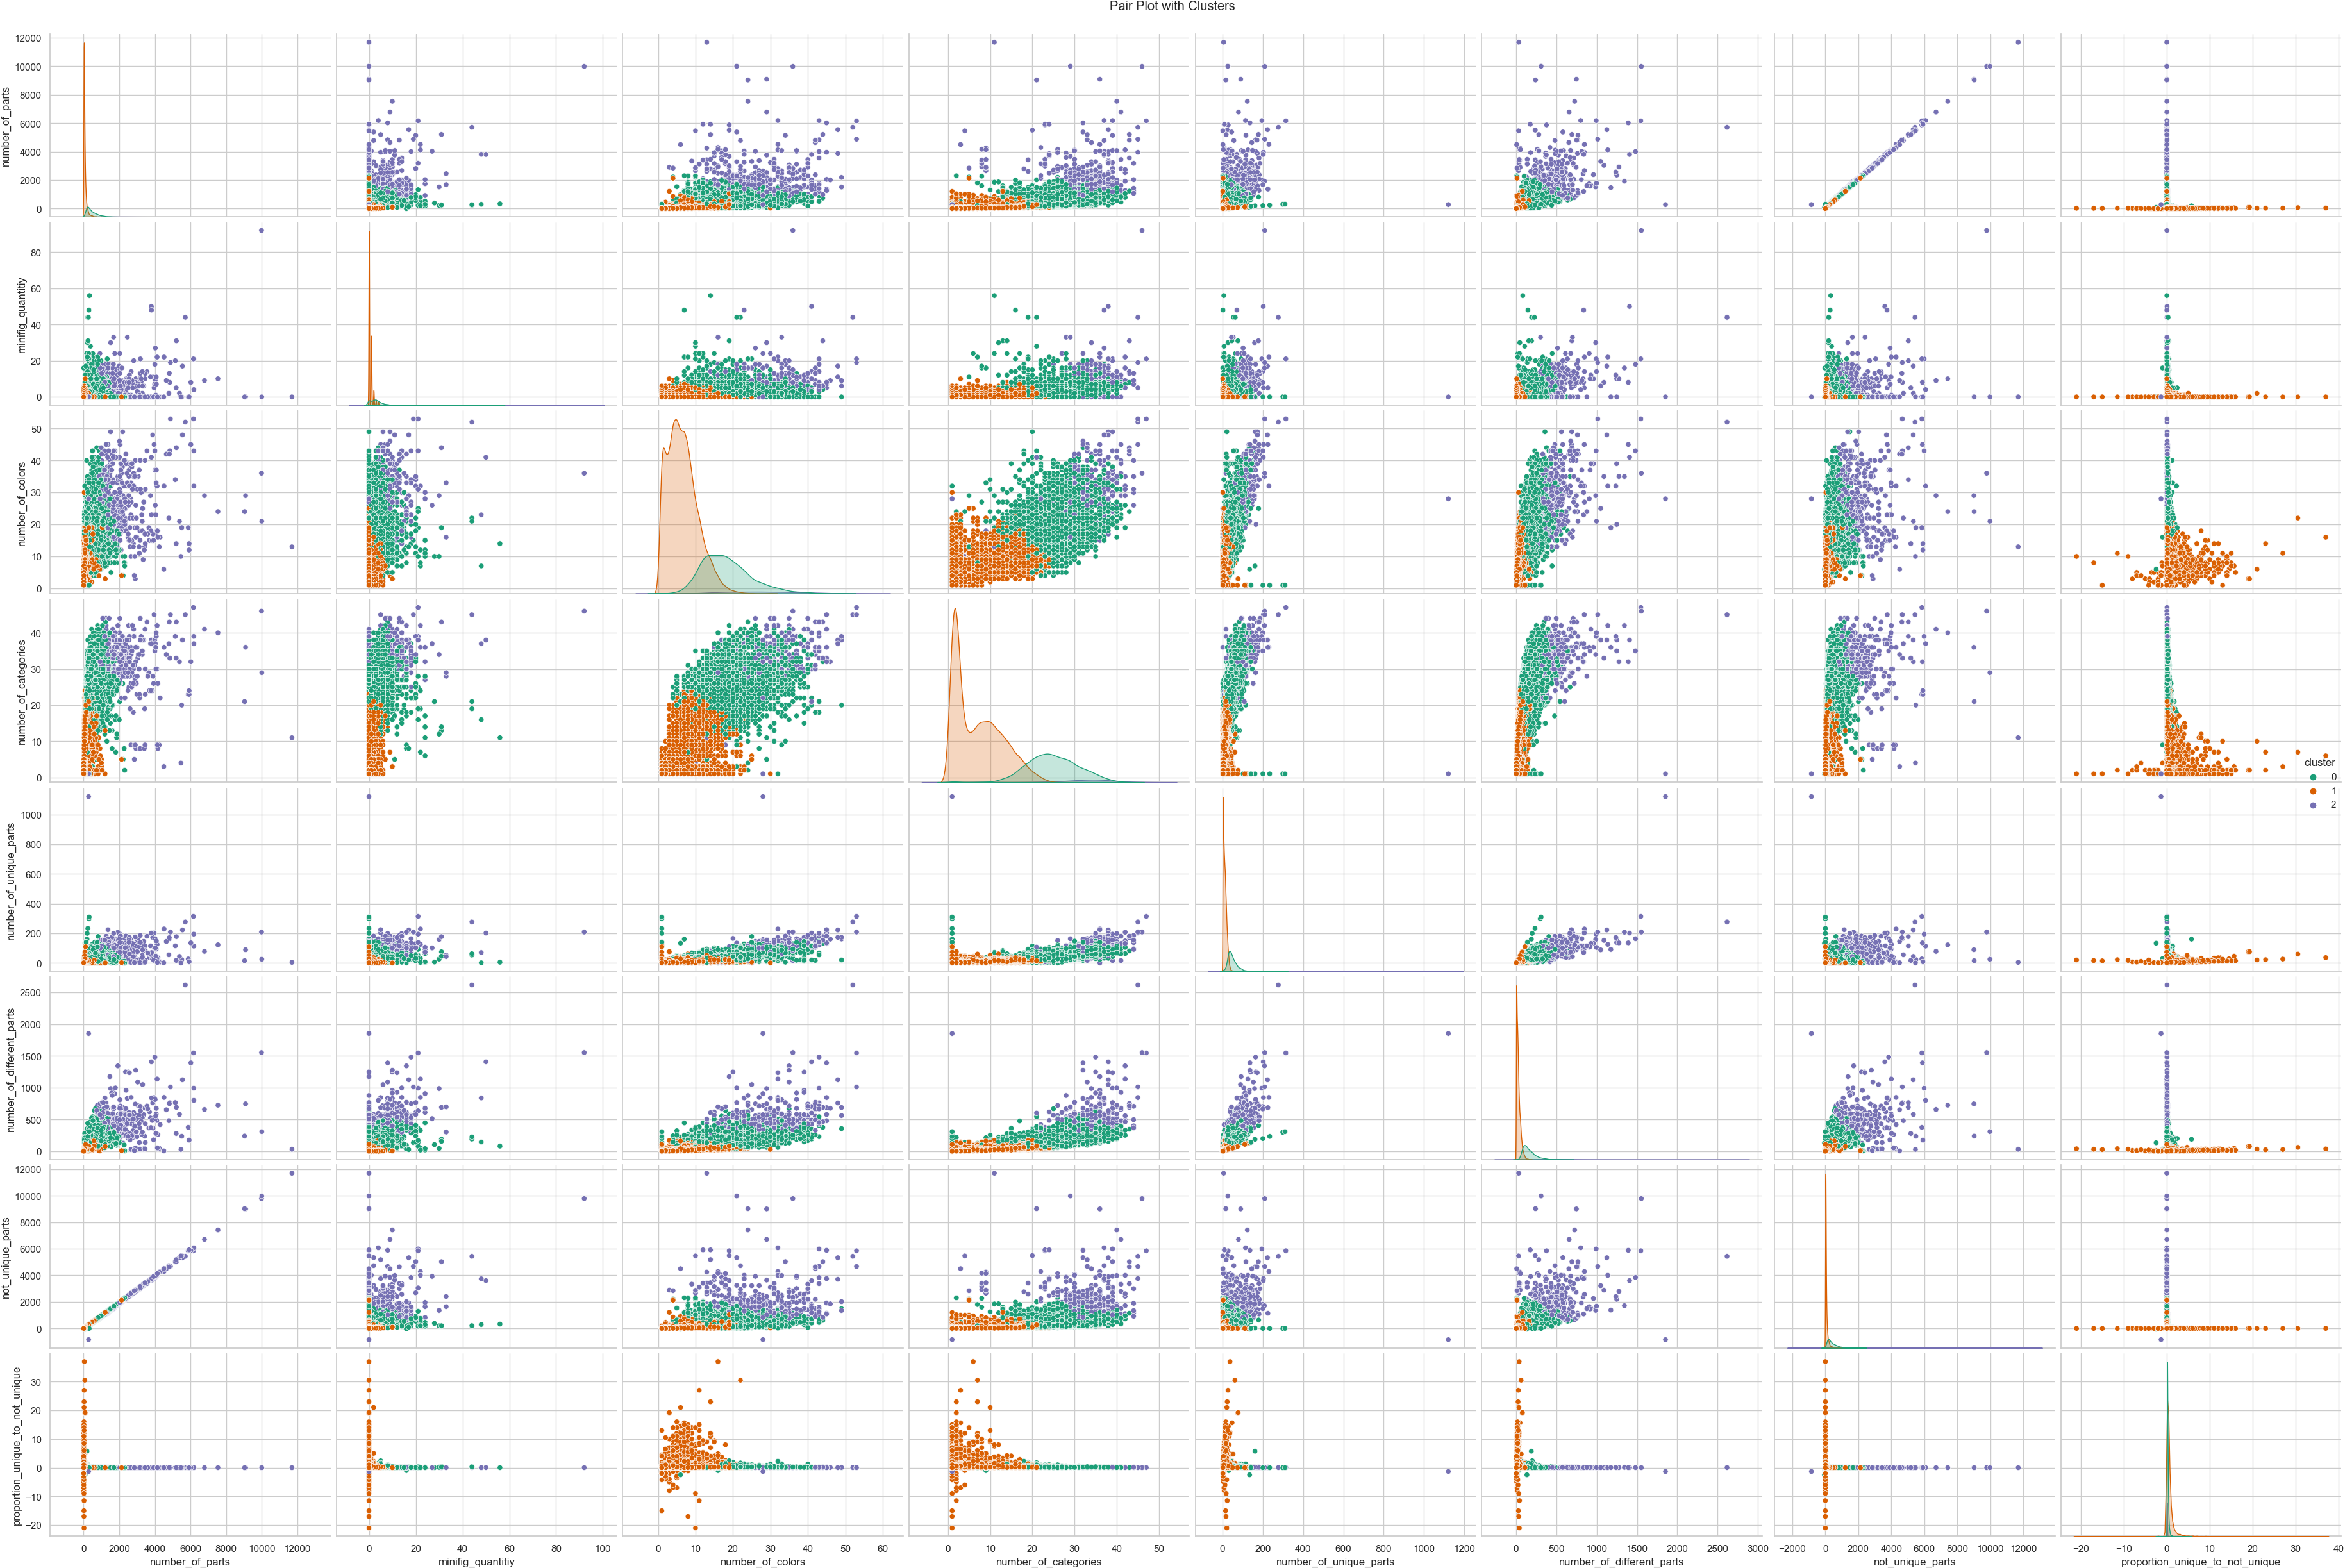

In [4]:
##### Plot the elbow method graph #####

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_k = 3  # You can change this based on the plot

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
data['cluster'] = clusters

# Visualize the clusters using a pair plot
sns.set(style="whitegrid")
sns.pairplot(data, hue='cluster', palette='Dark2', vars=columns_for_clustering, height=3, aspect=1.5)
plt.suptitle('Pair Plot with Clusters', y=1.02)
plt.show()

In [11]:
##### Print means of different factors in the clusters #####

# select only numeric columns for aggregation
numeric_columns = ['number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                    'number_of_categories', 'number_of_unique_parts',
                    'number_of_different_parts', 'not_unique_parts',
                    'proportion_unique_to_not_unique', 'complexity_score']

# ensure numeric columns have the correct data types (convert if necessary)
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# drop rows with missing values
df = data.dropna(subset=numeric_columns)

# group by cluster and calculate mean for numeric columns
cluster_means = data.groupby('cluster')[numeric_columns].mean()

# display the cluster means
print(cluster_means)

         number_of_parts  minifig_quantitiy  number_of_colors   
cluster                                                         
0             464.408022           3.288933         18.262936  \
1              64.939615           0.517967          6.509789   
2            2526.911854           7.346505         27.562310   

         number_of_categories  number_of_unique_parts   
cluster                                                 
0                   24.770735               47.651399  \
1                    7.055425               10.655181   
2                   32.164134               97.519757   

         number_of_different_parts  not_unique_parts   
cluster                                                
0                       161.019312        416.756623  \
1                        25.525189         54.284434   
2                       513.349544       2429.392097   

         proportion_unique_to_not_unique  complexity_score  
cluster                                       

/var/folders/1z/94kl8yts6ls80stcsg7ld0lw0000gn/T/ipykernel_82499/3475299197.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='relative_percentage', hue='cluster', data=cluster_year_counts, palette='Dark2', ci=None)


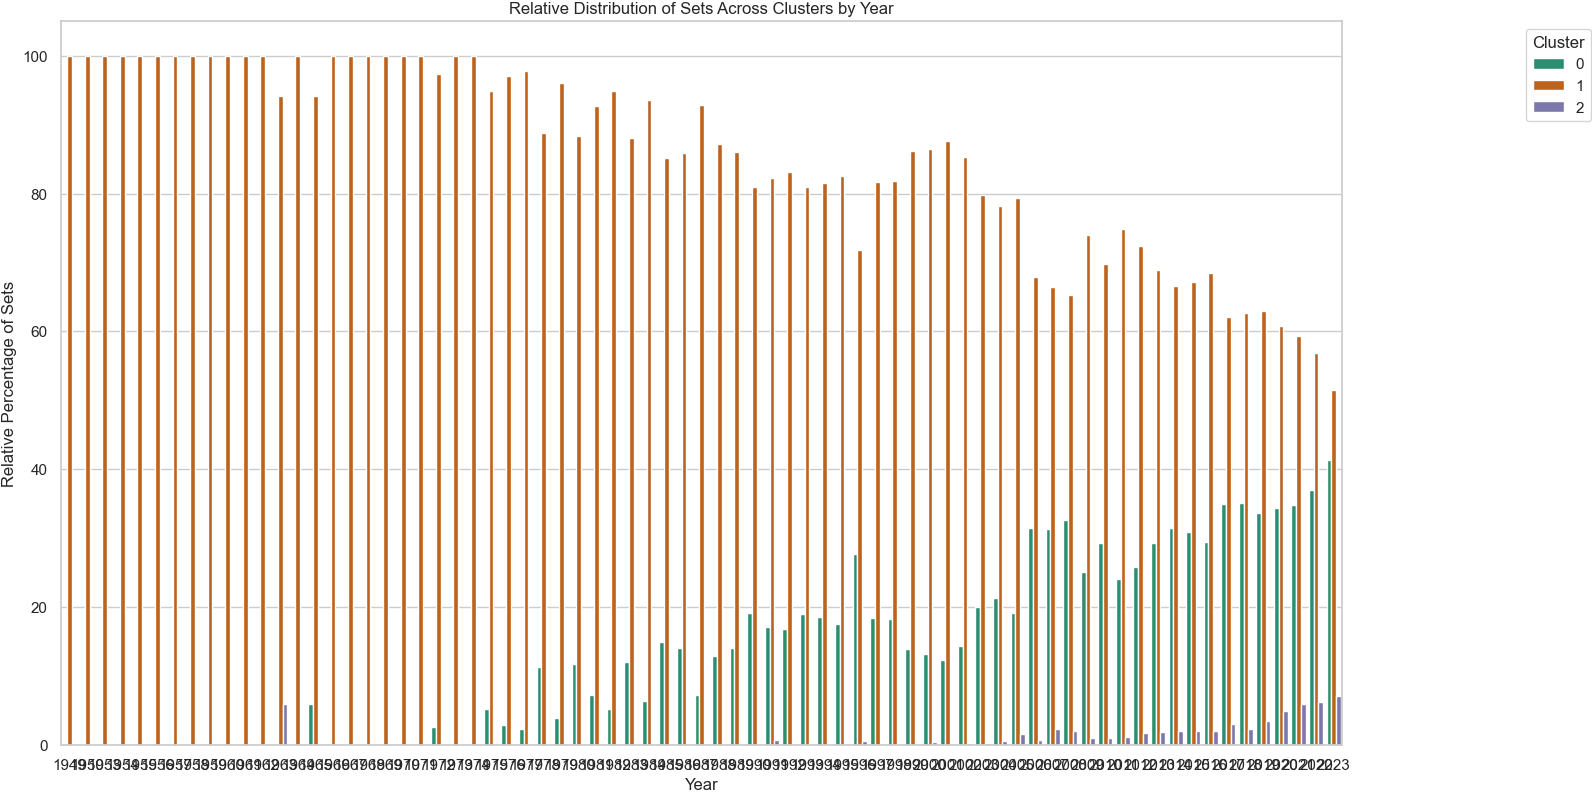

In [6]:
##### Plot the relative percentage of sets in each cluster for every year #####

cluster_year_counts = df.groupby(['year', 'cluster']).size().reset_index(name='set_count')

# calculate the relative percentage of sets in each cluster for every year
cluster_year_counts['relative_percentage'] = (
    cluster_year_counts.groupby('year')['set_count'].transform(lambda x: x / x.sum()) * 100
)

# plot the stacked bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x='year', y='relative_percentage', hue='cluster', data=cluster_year_counts, palette='Dark2', ci=None)
plt.title('Relative Distribution of Sets Across Clusters by Year')
plt.xlabel('Year')
plt.ylabel('Relative Percentage of Sets')
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

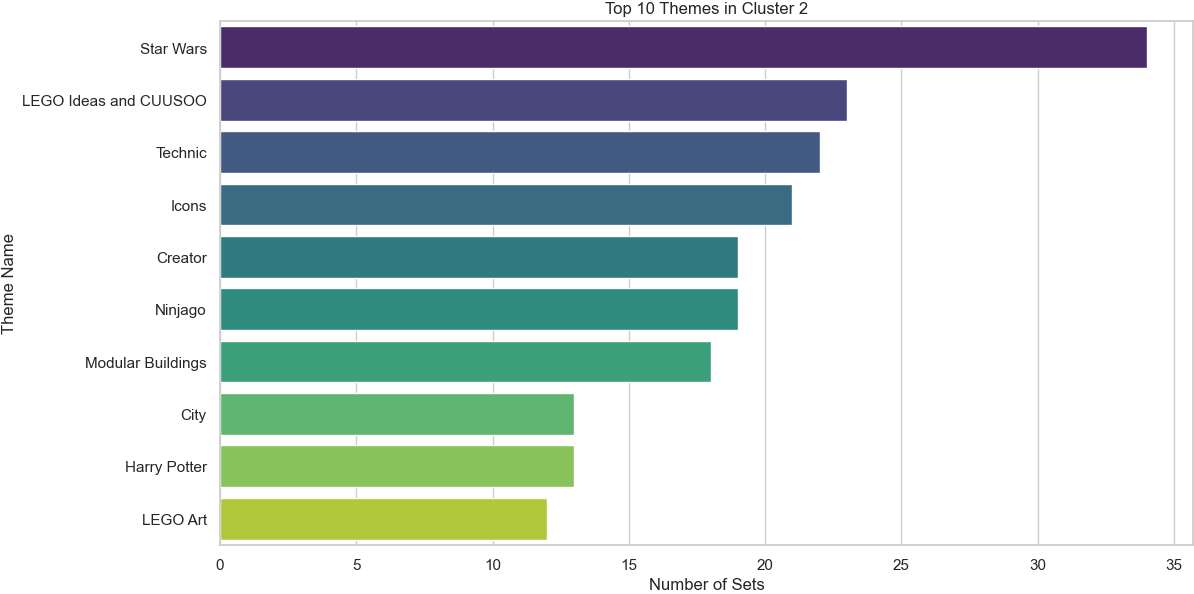

In [7]:
##### Plot 10 most complex themes ##### 

# assuming that cluster 2 accounts for the most complex sets, find out which themes are the most complex
cluster_2_df = df[df['cluster'] == 2]

# get the 10 most common themes in Cluster 2
top_10_themes_cluster_2 = cluster_2_df['theme_name'].value_counts().head(10)

# plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_themes_cluster_2.values, y=top_10_themes_cluster_2.index, palette='viridis')
plt.title('Top 10 Themes in Cluster 2')
plt.xlabel('Number of Sets')
plt.ylabel('Theme Name')
plt.show()

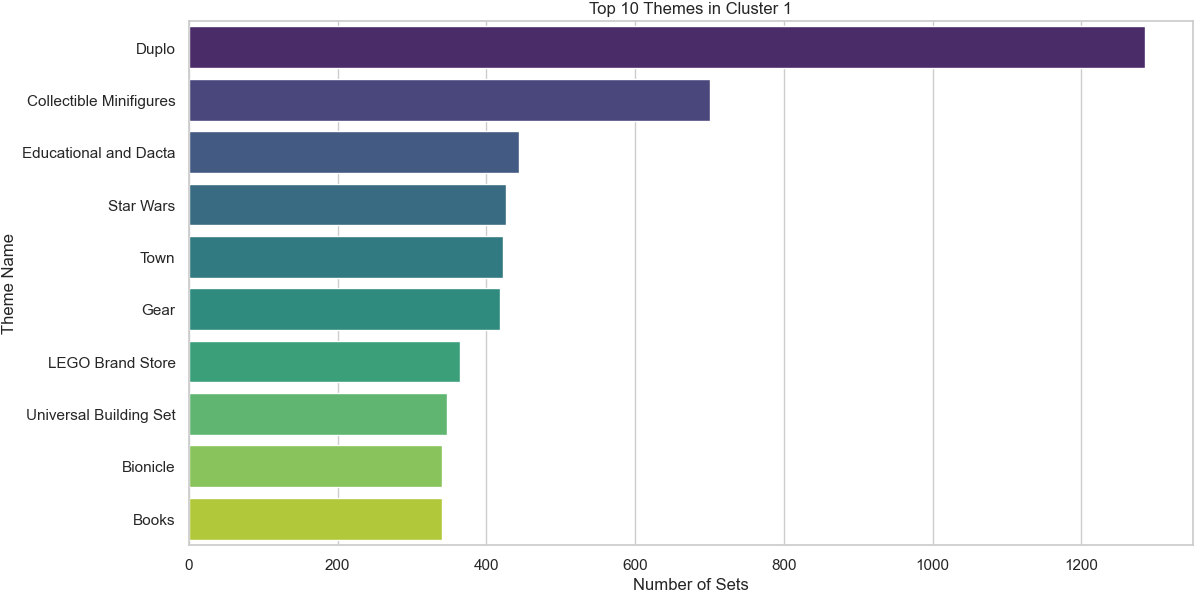

In [8]:
##### 10 middle complex themes #####

cluster_1_df = df[df['cluster'] == 1]

# get the 10 most common themes in Cluster 1
top_10_themes_cluster_1 = cluster_1_df['theme_name'].value_counts().head(10)

# plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_themes_cluster_1.values, y=top_10_themes_cluster_1.index, palette='viridis')
plt.title('Top 10 Themes in Cluster 1')
plt.xlabel('Number of Sets')
plt.ylabel('Theme Name')
plt.show()

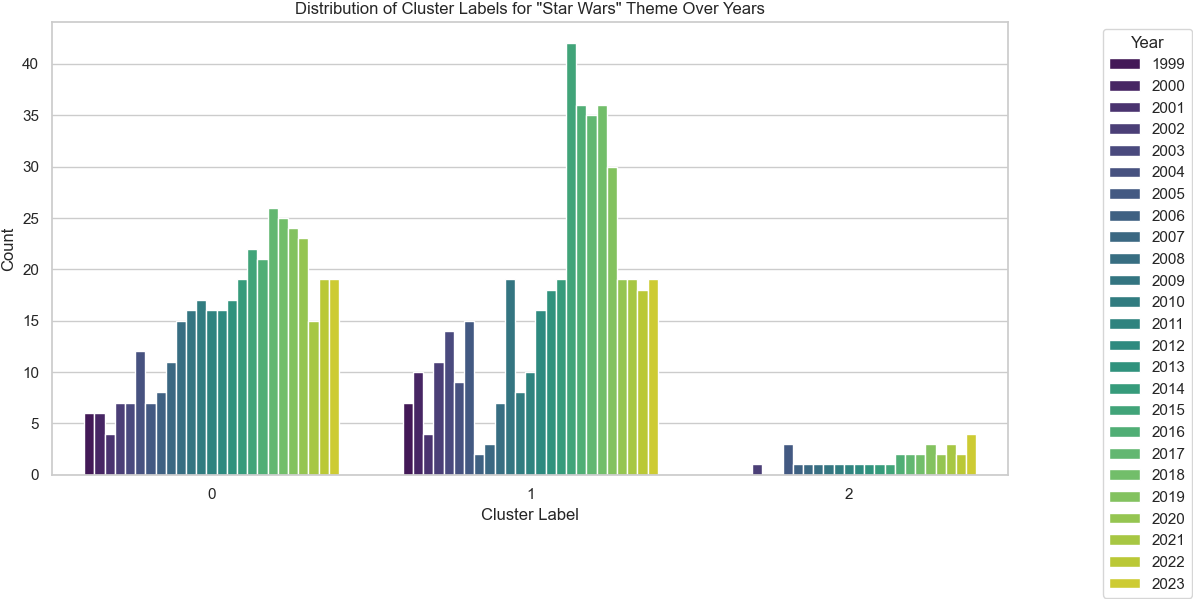

In [9]:
##### Plot the change of Star Wars complexity #####

# see how the clusters for the theme star wars has changed over time (Dass star wars top 1 ist in cluster 2, liegt vlt daran, dass es einfach so viele 
# star wars sets gibt

# filter the DataFrame for sets with theme name "Star Wars"
star_wars_df = df[df['theme_name'] == 'Star Wars']

# plot the count of cluster labels for "Star Wars" theme over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='year', data=star_wars_df, palette='viridis')
plt.title('Distribution of Cluster Labels for "Star Wars" Theme Over Years')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

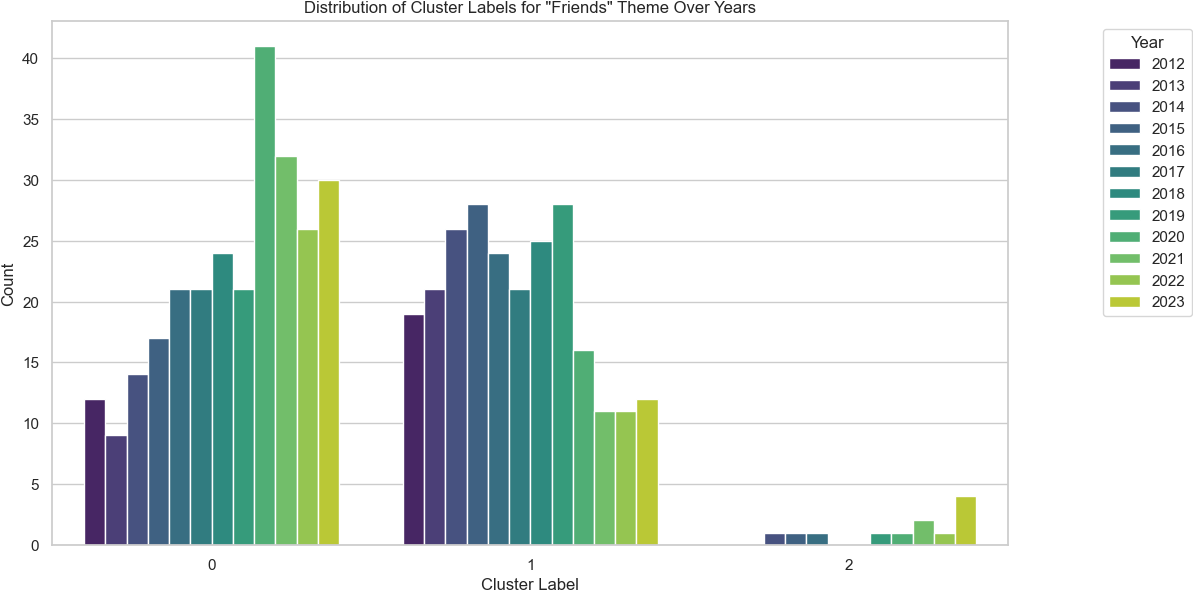

In [10]:
##### Plot the change of Friends complexity #####

# filter the DataFrame for sets with theme name "Star Wars"
friends_df = df[df['theme_name'] == 'Friends']

# plot the count of cluster labels for "Friends" theme over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='year', data=friends_df, palette='viridis')
plt.title('Distribution of Cluster Labels for "Friends" Theme Over Years')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()